In [1]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv('titanic.csv', delimiter=',')

In [3]:
def explore(dataframe):
    # Shape
    print("Total Records: ", dataframe.shape[0])
          
    #Check Missing/Null
    x = dataframe.columns[dataframe.isnull().any()].tolist()   
    if not x:
        print("No Missing/Null Records")
    else:        
        print("Found Missing Records")

In [4]:
explore(data)

Total Records:  891
Found Missing Records


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.shift()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,NaN,None,None
1,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886.0,0.0,3.0,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5.0,382652,29.1250,NaN,Q
887,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S
888,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S
889,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S


<Axes: title={'center': 'Распределение полов'}, xlabel='Sex', ylabel='count'>

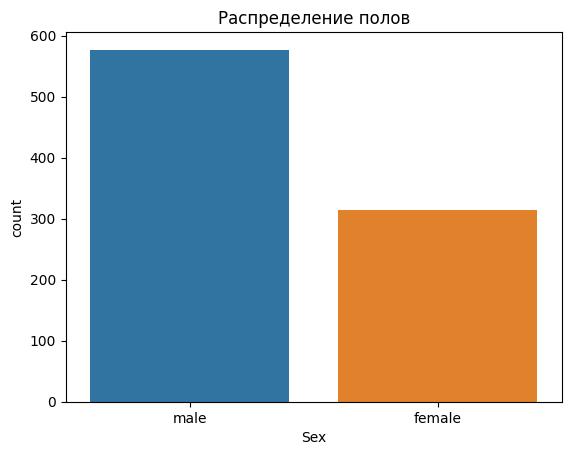

In [8]:
plt.title("Распределение полов")
sns.countplot(x='Sex', data=data)

In [9]:
df = px.data.tips()
fig = px.violin(data, y="Age", color="Sex",
                violinmode='overlay', # draw violins on top of each other
                # default violinmode is 'group' as in example above
                hover_data=data.columns)
fig.show()

In [10]:
df = px.data.tips()
fig = px.histogram(data, x="Age", y='Age', color="Sex", marginal="box", hover_data=data.columns)
fig.show()

In [11]:
df = px.data.tips()
fig = px.histogram(data, x="Age", y="Survived", color="Sex", marginal="box", hover_data=data.columns)
fig.show()

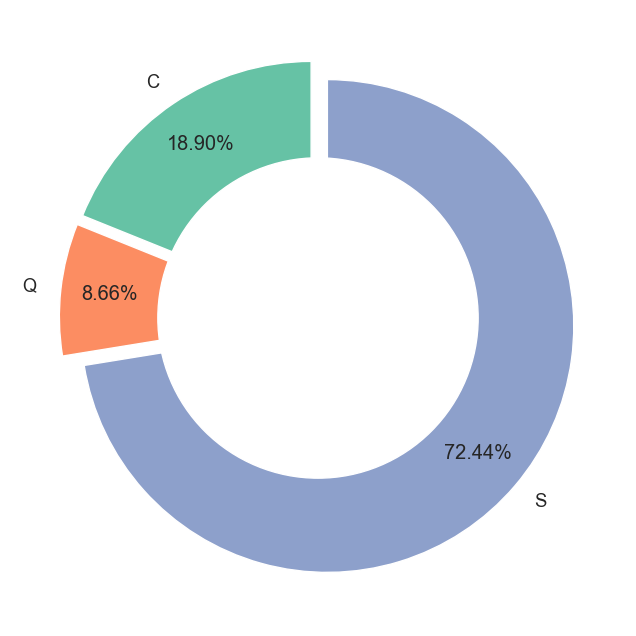

In [12]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

embrarked = data.groupby(by='Embarked')['Embarked'].count()

plt.pie(
    x=embrarked, 
    labels=embrarked.keys(),
    colors=sns.color_palette('Set2'),
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=0.80,
    explode=[0.05, 0.05, 0.05]
)

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

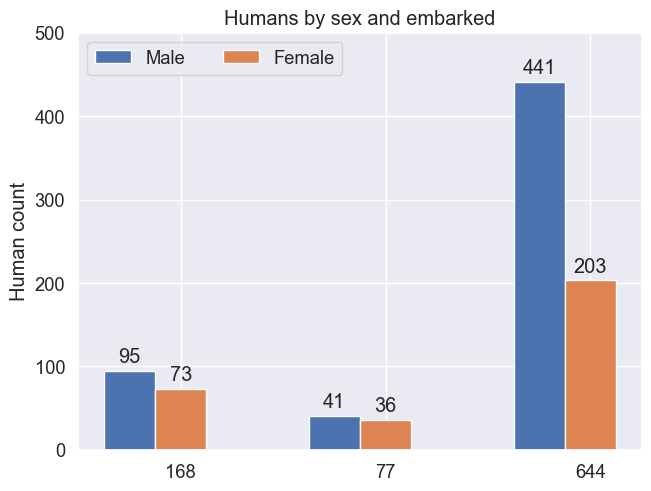

In [13]:
penguin_means = {
    'Male': data.loc[data['Sex'] == 'male'].groupby(by='Embarked')['Embarked'].count(),
    'Female': data.loc[data['Sex'] == 'female'].groupby(by='Embarked')['Embarked'].count(),
}

x = np.arange(len(embrarked))
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Human count')
ax.set_title('Humans by sex and embarked')
ax.set_xticks(x + width, embrarked)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 500)

plt.show()

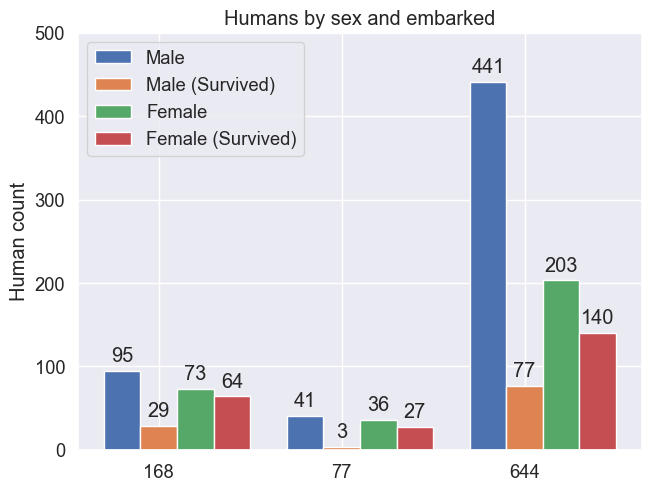

In [14]:
penguin_means = {
    'Male': data.loc[data['Sex'] == 'male'].groupby(by='Embarked')['Embarked'].count(),
    'Male (Survived)': data.loc[(data['Sex'] == 'male') & (data['Survived'] == 1)].groupby(by='Embarked')['Embarked'].count(),
    'Female': data.loc[data['Sex'] == 'female'].groupby(by='Embarked')['Embarked'].count(),
    'Female (Survived)': data.loc[(data['Sex'] == 'female') & (data['Survived'] == 1)].groupby(by='Embarked')['Embarked'].count(),
}

x = np.arange(len(embrarked))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Human count')
ax.set_title('Humans by sex and embarked')
ax.set_xticks(x + width, embrarked)
ax.legend()
ax.set_ylim(0, 500)

plt.show()

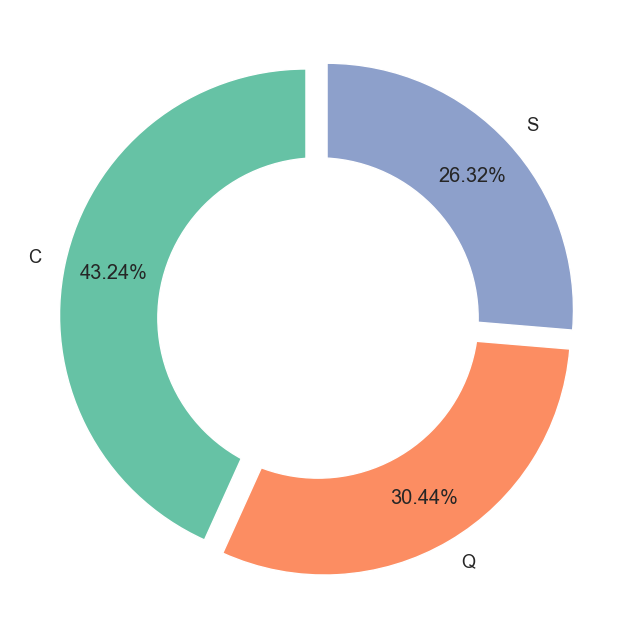

In [15]:
alive = data.loc[data['Survived'] == 1].groupby(by='Embarked')['Embarked'].count() / data.groupby(by='Embarked')['Embarked'].count() 

sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

embrarked = data["Embarked"].unique()
embrarked = embrarked[~pd.isnull(embrarked)]

plt.pie(
    x=alive, 
    labels=alive.keys(),
    colors=sns.color_palette('Set2'),
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=0.80,
    explode=[0.05, 0.05, 0.05]
)

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

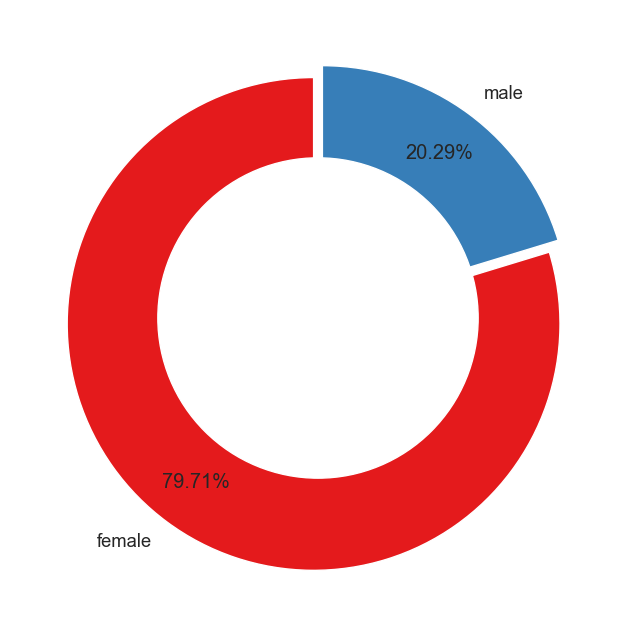

In [16]:
alive = data.loc[data['Survived'] == 1].groupby(by='Sex')['Sex'].count() / data.groupby(by='Sex')['Sex'].count() 

sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

sex = data["Sex"].unique()

plt.pie(
    x=alive, 
    labels=alive.keys(),
    colors=sns.color_palette('Set1'),
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=0.80,
    explode=[0.03, 0.03]
)

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()